In [5]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [70]:
import pandas as pd 
import matplotlib.pyplot as plt

df_X = pd.DataFrame(diabetes.data)
df_y = pd.DataFrame(diabetes.target)

x = df_X.values
y = df_y.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def model(x, w, b):
    y = w * x + b
    return y

def mse(a, b):
    mse1 = ((a - b) ** 2).mean()
    return mse1

def loss(X,W,b,y):
    predictions = model(X,W,b)
    Loss = mse(predictions,y)
    return Loss

def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db


LEARNING_RATE = 0.1
w = 3.1
b = 2.3
losses = []

for i in range(1, 16001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 100 : Loss 6315.1500
Iteration 200 : Loss 5923.6364
Iteration 300 : Loss 5913.2402
Iteration 400 : Loss 5909.5789
Iteration 500 : Loss 5906.0673
Iteration 600 : Loss 5902.5895
Iteration 700 : Loss 5899.1430
Iteration 800 : Loss 5895.7276
Iteration 900 : Loss 5892.3429
Iteration 1000 : Loss 5888.9887
Iteration 1100 : Loss 5885.6648
Iteration 1200 : Loss 5882.3708
Iteration 1300 : Loss 5879.1065
Iteration 1400 : Loss 5875.8715
Iteration 1500 : Loss 5872.6658
Iteration 1600 : Loss 5869.4889
Iteration 1700 : Loss 5866.3406
Iteration 1800 : Loss 5863.2207
Iteration 1900 : Loss 5860.1289
Iteration 2000 : Loss 5857.0649
Iteration 2100 : Loss 5854.0286
Iteration 2200 : Loss 5851.0196
Iteration 2300 : Loss 5848.0377
Iteration 2400 : Loss 5845.0827
Iteration 2500 : Loss 5842.1543
Iteration 2600 : Loss 5839.2523
Iteration 2700 : Loss 5836.3764
Iteration 2800 : Loss 5833.5265
Iteration 2900 : Loss 5830.7022
Iteration 3000 : Loss 5827.9034
Iteration 3100 : Loss 5825.1298
Iteration 3200 : 

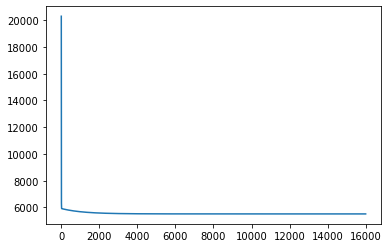

In [59]:
plt.plot(losses)
plt.show()

In [63]:
predictions = model(X_test, w, b)
mse = loss(X_test, w, b, y_test)
mse

4940.633598542848

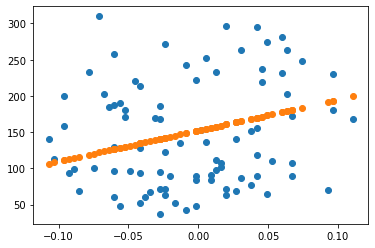

In [69]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions[:, 0], label="pred")
plt.show()

In [ ]:
#--------------------------------------------------------------------------

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/aiffel/data/data/bike-sharing-demand/train.csv")
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


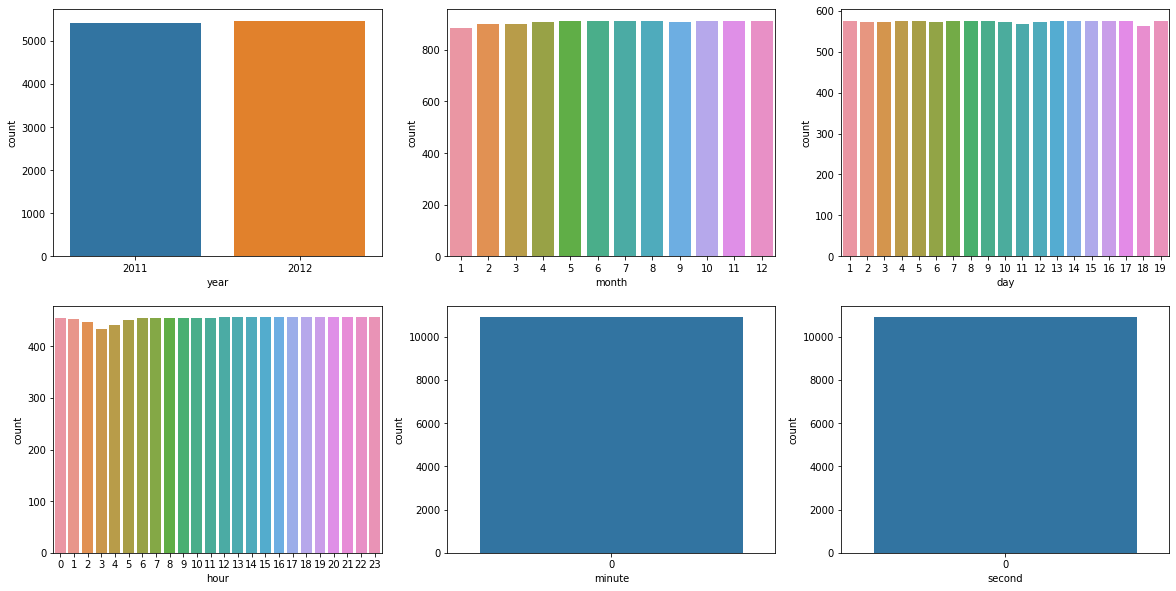

In [5]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(x='year', data=train)

plt.subplot(2,3,2)
sns.countplot(x='month', data=train)

plt.subplot(2,3,3)
sns.countplot(x='day', data=train)

plt.subplot(2,3,4)
sns.countplot(x='hour', data=train)

plt.subplot(2,3,5)
sns.countplot(x='minute', data=train)

plt.subplot(2,3,6)
sns.countplot(x='second', data=train)

plt.show()


In [6]:
X = train[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',]].values
y = train[['count']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([[196.41748576],
       [ 64.85450479],
       [380.81253837],
       ...,
       [ 66.95692366],
       [277.15412839],
       [161.86109005]])

In [8]:
rmse = mean_squared_error(y_test, predictions, squared = False)

print('RMSE :',rmse, 'MSE :', mean_squared_error(y_test, predictions))

RMSE : 145.15616206408876 MSE : 21070.311385176003


In [10]:
col = ['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
X_test_df = pd.DataFrame(X_test, columns=col)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test

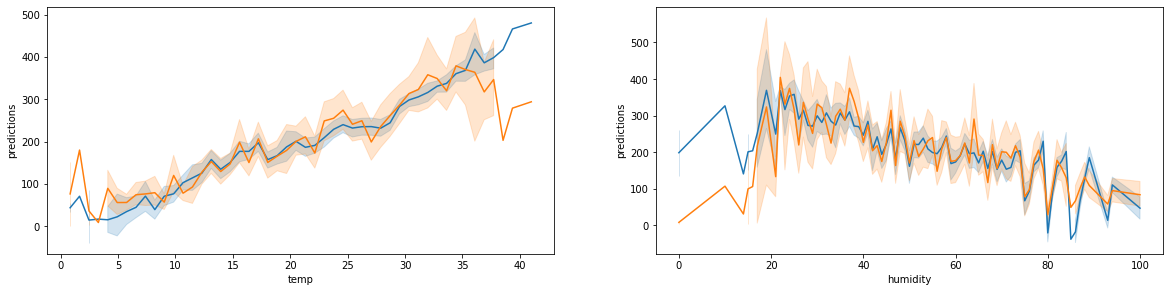

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['predictions'])

#orange color is prediction
plt.subplot(2,2,1)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['y_test'])

plt.subplot(2,2,2)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['predictions'])

#orange color is prediction
plt.subplot(2,2,2)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['y_test'])

plt.show()

### 회고
----

